## A. Business Problem

### A.1 Konteks

Saat ini transaksi online sangat banyak digunakan oleh pelanggan. Tawaran kemudahan yang diberikan, pemberian reward, promo dan cicilan menjadikan kartu kredit sebagai pilihan pembayaran yang banyak digunakan oleh pelanggan. Namun semakin banyaknya transaksi online menggunakan kartu kredit, semakin banyak juga frekuensi dan kompleksitas penipuan yang terjadi. Hal ini tidak hanya merugikan dari sisi Bank Penerbit namun juga dari sisi nasabah. Deteksi penipuan kartu kredit merupakan tantangan yang besar saat ini bagi Bank Penerbit. Oleh karena itu, Bank harus memiliki sistem yang mempu mendeteksi transaksi yang mencurigakan secara real-time. 

### A.2 Problem Statement

Tingkat kasus fraud yang tinggi merupakan masalah signifikan yang bisa berdampak pada kerugian finansial bahkan yang terburuk bisa menghilangkan kepercayaan nasabah terhadap bank. Persaingan yang tinggi antar bank untuk menawarkan produk kartu kredit membuat bank berlomba-lomba memberikan fitur terbaik untuk berusaha meningkatkan kepercayaan nasabah. Ketidakseimbangan antara jumlah transaksi yang sah dan yang curang membuat proses deteksi penipuan menjadi sulit. Jika salah mendeteksi transaksi, pelanggan akan merasa sangat dirugikan. Untuk mengatasi tantangan ini, diperlukan pengembangan sistem deteksi penipuan yang canggih dan andal. Sistem ini harus mampu untuk mengatasi perbedaan besar antara jumlah transaksi sah dan penipuan sehingga model deteksi tetap akurat dan mengidentifikasi transaksi mencurigakan secara instan untuk mencegah kerugian lebih lanjut.



### A.3 Tujuan
1. Mengidentifikasi Karakteristik Penipuan Transaksi kartu kredit 
2. Mengembangkan dan menerapkan model machine learning yang dapat menganalisis transaksi kartu kredit secara real-time untuk mendeteksi aktivitas mencurigakan dan penipuan

### A.4 Metrics Evaluation

True Positive (TP): Transaksi yang benar-benar penipuan yang terdeteksi dan ditandai sebagai penipuan oleh sistem.
True Negative (TN): Transaksi yang benar-benar sah dan tidak ditandai sebagai penipuan oleh sistem.

Pada kasus ini, terdapat dua tipe error yang jadi perhatian saat pembuatan model prediksi:

False Positive (FP): Transaksi sah yang salah dikenali sebagai penipuan
Konsekuensi: nasabah terganggu karena transaksi ditolak
False Negative (FN): Transaksi penipuan yang tidak terdeteksi dan dianggap sah
Konsekuensi: Mengalami kerugian finansial

Target:

0 : Non-Fraud
1 : Fraud

Berdasarkan konsekuensi dari False Positive (FP) dan False Negative (FN) maka metriks yang digunakan adalah F1 score, yang merupakan rataan harmonik dari presisi dan recall, untuk menjaga keseimbangan antara keduanya.

## B. Data Understanding


### B.1 Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from scipy.stats import shapiro, chi2_contingency, mannwhitneyu
from folium.plugins import HeatMap
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import shap



### B.2 Dataset import & understanding

In [2]:
data = pd.read_csv("fraudTrain.csv")
data = data.drop(columns = 'Unnamed: 0', axis=1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

Dataset ini adalah data dari periode periode - 1 Jan 2019 hingga 31 Des 2020. Terdapat 1.296.675 data di dataset fraud train. Sample yang akan di gunakan 10% dari populasi dataset. Sampel akan dipilih secara random.

In [4]:
df = data.sample(frac=0.05, random_state=1) 
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0
619078,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.0770,-84.3033,165556,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,34.551957,-83.374265,0
573850,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,Bay City,...,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,43.032957,-83.521294,0


#### DESKRIPSI TABEL 
- trans_date_trans_time: Waktu transaksi (format datetime).

- cc_num: Nomor kartu kredit.

- merchant: Nama pedagang.

- category: Kategori transaksi.

- amt: Jumlah transaksi (dalam satuan mata uang).

- first: Nama depan pemilik kartu.

- last: Nama belakang pemilik kartu.

- gender: Jenis kelamin pemilik kartu.

- street: Alamat jalan pemilik kartu.

- city: Kota pemilik kartu.

- state: Negara bagian pemilik kartu.

- zip: Kode pos pemilik kartu.

- lat: Latitude (garis lintang) lokasi pemilik kartu.

- long: Longitude (garis bujur) lokasi pemilik kartu.

- city_pop: Populasi kota tempat tinggal pemilik kartu.

- job: Pekerjaan pemilik kartu.

- dob: Tanggal lahir pemilik kartu.

- trans_num: Nomor transaksi unik.

- unix_time: Waktu transaksi dalam format Unix Time.

- merch_lat: Latitude lokasi pedagang.

- merch_long: Longitude lokasi pedagang.

- is_fraud: Indikator apakah transaksi adalah fraud (0 = bukan fraud, 1 = fraud).

In [5]:
display(df.describe().T, df.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
cc_num,64834.0,4.133924e+17,1.302920e+18,6.041621e+10,1.800429e+14,3.520550e+15,4.653879e+15,4.992346e+18
amt,64834.0,6.954088e+01,1.483568e+02,1.000000e+00,9.590000e+00,4.729000e+01,8.304000e+01,1.789724e+04
zip,64834.0,4.866613e+04,2.689498e+04,1.257000e+03,2.604100e+04,4.808800e+04,7.201100e+04,9.978300e+04
lat,64834.0,3.851834e+01,5.059803e+00,2.002710e+01,3.459060e+01,3.934260e+01,4.184670e+01,6.568990e+01
long,64834.0,-9.014625e+01,1.370457e+01,-1.656723e+02,-9.678690e+01,-8.734900e+01,-8.013810e+01,-6.795030e+01
city_pop,64834.0,8.853439e+04,3.026767e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,64834.0,1.349164e+09,1.278444e+07,1.325376e+09,1.338733e+09,1.349100e+09,1.359189e+09,1.371815e+09
merch_lat,64834.0,3.851856e+01,5.094633e+00,1.907561e+01,3.472081e+01,3.934809e+01,4.192898e+01,6.651458e+01
merch_long,64834.0,-9.014733e+01,1.371727e+01,-1.665882e+02,-9.682731e+01,-8.732498e+01,-8.019731e+01,-6.697989e+01
is_fraud,64834.0,5.413826e-03,7.337983e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


,count,unique,top,freq
trans_date_trans_time,64834,64779,2019-01-28 18:48:55,2
merchant,64834,693,fraud_Kilback LLC,222
category,64834,14,gas_transport,6593
first,64834,341,Christopher,1372
last,64834,471,Smith,1429
gender,64834,2,F,35708
street,64834,932,6033 Young Track Suite 804,182
city,64834,855,Birmingham,327
state,64834,51,TX,4774
job,64834,483,Film/video editor,548


## C. Exploratory Data Analysis (EDA)

### C.1 Proporsi Fraud vs Non-Fraud


In [6]:
df1 = df.copy()
count_fraud = df1["is_fraud"].value_counts()
count_fraud = pd.DataFrame(count_fraud)
count_fraud

,count
is_fraud,
0,64483
1,351


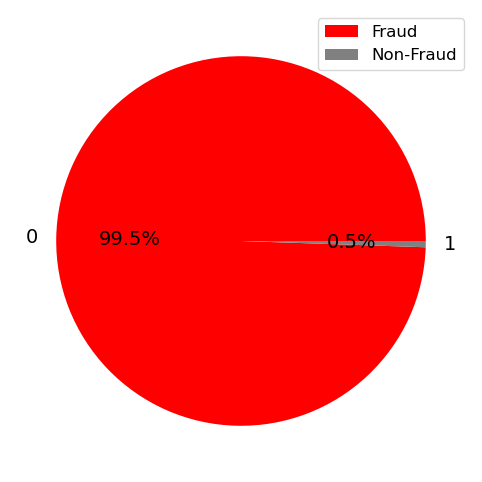

In [7]:
# Persentase Fraud
percentage_fraud = df1["is_fraud"].value_counts(normalize=True)*100
 
# Membuat diagram
plt.figure(figsize=(8,6))
plt.pie(percentage_fraud, autopct='%1.1f%%', labels=percentage_fraud.index,
    colors=['Red', 'Grey'],
    textprops={'fontsize': 14, 'color': 'black'})
plt.legend(labels= ['Fraud', 'Non-Fraud'],loc= 'upper right', fontsize=12 )
plt.show()

Persentase perbandingan data Fraud dan NonFraud adalah 99.5% dan 0.5%. Ini menunjukkan data yang imbalance.

### C.2 Analisis Univariat dan Bivariat


#### Data splitting (Numeric & Categoric)


In [8]:
col_numeric = df1.select_dtypes(include=["int", "float"]).drop(columns=['is_fraud'], axis=1)
col_numeric.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
94102,374497717543058,20.00,58579,47.1709,-100.7944,1190,1330158280,46.398331,-99.813959
198791,4428154703770710,284.88,99113,46.5901,-117.1692,761,1334260215,45.687331,-117.488135
1238587,213148039875802,5.07,33510,27.9551,-82.2966,79613,1370037053,27.254081,-81.974799
619078,2283743876903625,45.38,30009,34.0770,-84.3033,165556,1348160812,34.551957,-83.374265
573850,4798937978667559470,27.52,48706,43.6088,-83.9530,67858,1346455370,43.032957,-83.521294


In [9]:
col_categoric = df1.select_dtypes(include="object")
col_categoric.head()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
94102,2019-02-25 08:24:40,fraud_Funk Group,grocery_net,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,ND,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0
198791,2019-04-12 19:50:15,"fraud_Prosacco, Kreiger and Kovacek",home,Brittany,Guerra,F,79209 Gary Dale,Colton,WA,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0
1238587,2020-05-31 21:50:53,"fraud_Langworth, Boehm and Gulgowski",shopping_net,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,FL,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7
619078,2019-09-20 17:06:52,fraud_Conroy-Emard,food_dining,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8
573850,2019-08-31 23:22:50,fraud_Adams-Barrows,health_fitness,Robert,Williams,M,09419 Lewis Rapids,Bay City,MI,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b


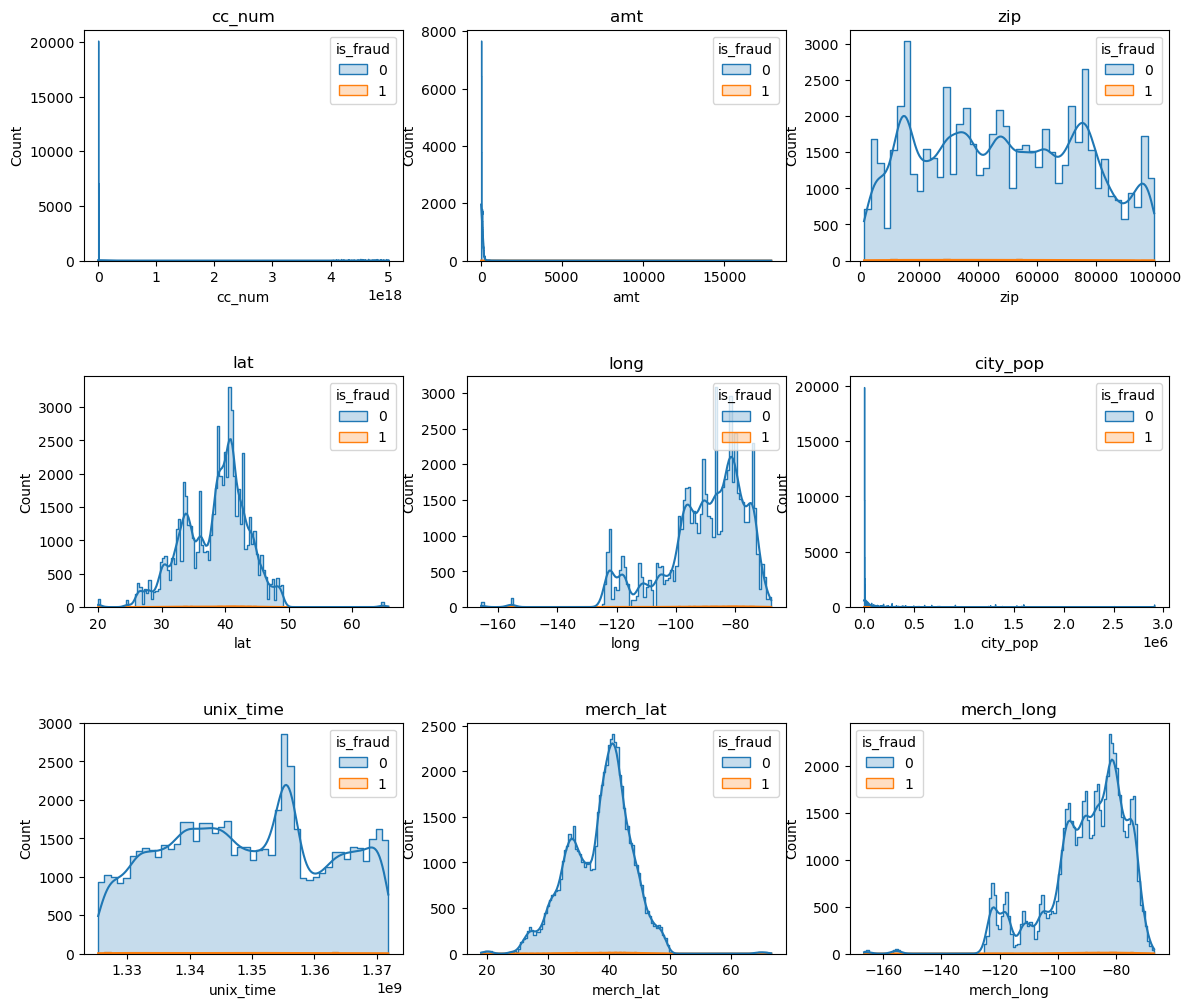

In [10]:
plt.figure(figsize =(14,12))
for i, col in enumerate(col_numeric.columns, start = 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df1, x=col, hue="is_fraud", kde=True, element="step")
    plt.title(col)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
### Normality data distribution
significance = 0.05
result_normality_test = {}
for column in col_numeric:
    stat, p = shapiro(df1[column])
    is_significant = p < significance
    result_normality_test[column] = {'Statistic': stat, 'p-value' : p, 'Significant' : is_significant}
result_normality_df = pd.DataFrame(result_normality_test).T
print(result_normality_df)

           Statistic p-value Significant
cc_num      0.331829     0.0        True
amt         0.300705     0.0        True
zip         0.963649     0.0        True
lat         0.978022     0.0        True
long        0.917796     0.0        True
city_pop    0.316379     0.0        True
unix_time   0.965357     0.0        True
merch_lat   0.980183     0.0        True
merch_long  0.918737     0.0        True


p-value may not be accurate for N > 5000.


Berdasarkan uji normalitas di tiap kolom numerikal menunjukkan dan memvalidasi bahwa persebaran dataset tidak terdistribusi secara normal

### Lokasi Merchant yg terjadi fraud 

In [12]:
fraud_merchant_lat = df1[df1['is_fraud']==1]['merch_lat']
fraud_merchant_long = df1[df1['is_fraud']==1]['merch_long']
print(f"jumlah merchant yang terindikasi fraud {fraud_merchant_lat.count()}")

jumlah merchant yang terindikasi fraud 351


In [13]:
#Peta persebaran lokasi merchant terindikasi fraud
m = folium.Map(location=[df1['merch_lat'].mean(), df1['merch_long'].mean()], zoom_start=6)
heat_data = [[lat, long] for lat, long in zip(fraud_merchant_lat, fraud_merchant_long)]
HeatMap(heat_data).add_to(m)
m

Area yang berwarna merah menunjukkan konsentrasi tertinggi dari merchant yang terindikasi fraud. Semakin merah area tersebut, semakin tinggi konsentrasi merchant fraud di area itu.

### Category 

In [14]:
df1['category'].value_counts()

category
gas_transport     6593
grocery_pos       6173
home              6168
shopping_pos      5920
kids_pets         5580
shopping_net      4908
entertainment     4656
food_dining       4647
personal_care     4457
health_fitness    4315
misc_pos          3970
misc_net          3169
grocery_net       2295
travel            1983
Name: count, dtype: int64

In [15]:
online_cat = ['shopping_net', 'misc_net', 'grocery_net']
offline_cat = ['gas_transport','grocery_pos', 'home', 'kids_pets', 'shopping_pos', 
              'personal_care', 'entertainment', 'food_dining','health_fitness', 'misc_pos', 'travel']
df1['type_cat'] = df1['category'].apply(lambda x : 'Online' if x in online_cat else 'Offline')

In [16]:
fraud_df = df1[df1['is_fraud']==1]
online_fraud = fraud_df[fraud_df['type_cat']=='Online']
offline_fraud = fraud_df[fraud_df['type_cat']=='Offline']
average_online = online_fraud['amt'].mean()
average_offline = offline_fraud['amt'].mean()
average_online
average_online,average_offline

(890.6111940298507, 346.5434101382488)

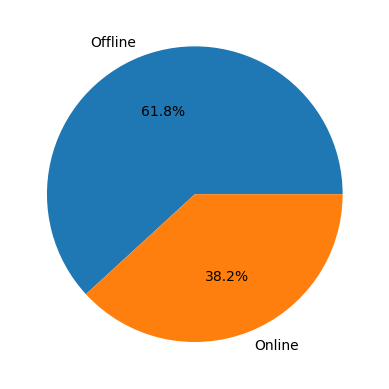

In [17]:
fraud_df = df1[df1['is_fraud'] == 1]
fraud_percentage = fraud_df['type_cat'].value_counts(normalize=True)*100
plt.pie(fraud_percentage, labels=fraud_percentage.index,     
    autopct=lambda p: f'{p:.1f}%')
plt.show()

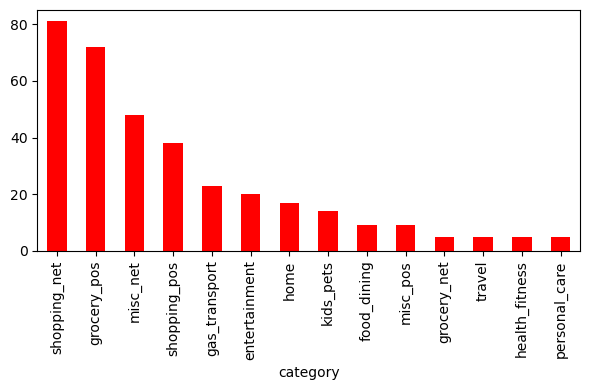

In [18]:
fraud_counts = fraud_df['category'].value_counts()
fraud_df_sorted = fraud_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(6,4))
fraud_df_sorted.plot(kind='bar', color='red', ax=ax)
plt.tight_layout()
plt.show()


In [19]:
average_amount_cat = df1.groupby('category')['amt'].mean()
average_amount_cat_sorted = average_amount_cat.sort_values(ascending= False)

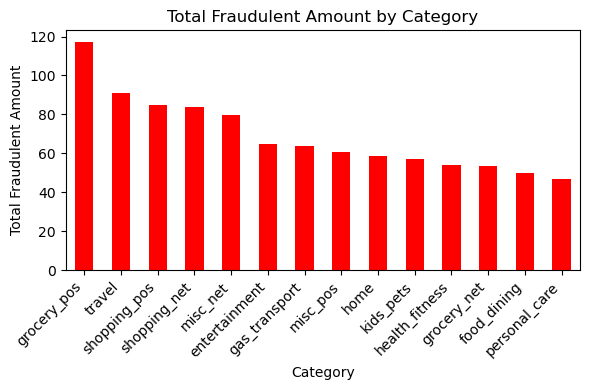

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
average_amount_cat_sorted.plot(kind='bar', color='red', ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Total Fraudulent Amount')
ax.set_title('Total Fraudulent Amount by Category')
ax.set_xticklabels(average_amount_cat_sorted.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kategori Rentan: Shopping net dan grocery pos adalah kategori transaksi yang paling rawan terhadap fraud.
Nilai Fraud Besar:  kategori grocery pos menunjukkan nilai transaksi fraud yang tinggi.
Offline vs. Online: Fraud lebih umum terjadi dalam transaksi offline namun secara rata-rata total nominal pembelanjaan ditoko online lebih besar

### Age 

In [21]:
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')
df1['date'] = df1['trans_date_trans_time'].dt.date
df1['dob'] = pd.to_datetime(df['dob'])
df1['date'] = pd.to_datetime(df1['date'])
df1['age'] = df1['date'].dt.year - df1['dob'].dt.year - (
    (df1['date'].dt.month < df1['dob'].dt.month) |
    ((df1['date'].dt.month == df1['dob'].dt.month) & (df1['date'].dt.day < df1['dob'].dt.day))
)

In [22]:
bins = [0,18,35,50,65,100]
labels = ["Teenager", "Young Adult", "Adult", "Senior", "Elderly"]
df1['age_group']= pd.cut(df1['age'], bins = bins, labels = labels)
df_fraud = df1[df1['is_fraud']==1]['age_group']
df_fraud_percentage = df_fraud.value_counts(normalize=True)*100
df_fraud_percentage_sorted = df_fraud_percentage.sort_values(ascending=False)


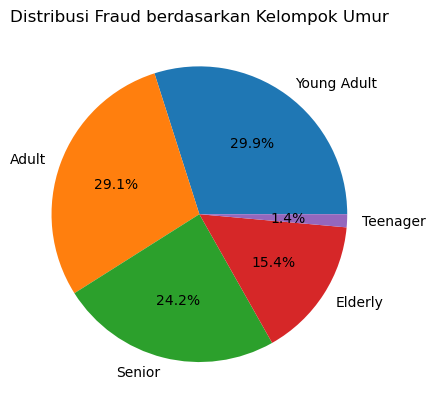

In [23]:
plt.pie(df_fraud_percentage,
    labels=df_fraud_percentage.index,     
    autopct=lambda p: f'{p:.1f}%')
plt.title('Distribusi Fraud berdasarkan Kelompok Umur')
plt.show()

"Young Adult" dan "Adult" memiliki persentase transaksi fraud yang tinggi, hal ini dapat disimpulkan bahwa kelompok ini mungkin lebih sering terlibat atau menjadi target dalam aktivitas penipuan.

### Gender

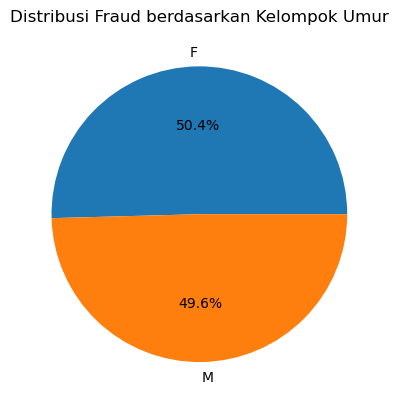

In [24]:
df_gender = df1[df1['is_fraud']==1]['gender']
df_gender_count = df_gender.value_counts(normalize=True)*100

plt.pie(df_gender_count,
    labels=df_gender_count.index,     
    autopct=lambda p: f'{p:.1f}%')
plt.title('Distribusi Fraud berdasarkan Kelompok Umur')
plt.show()

Berdasarkan gender terlihat bahwa persentase Male lebih tinggi daripada Female yang terdeteksi fraud

### Jarak Pelanggan ke Toko

In [25]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

df['transaction_distance'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
# Jarak dalam km

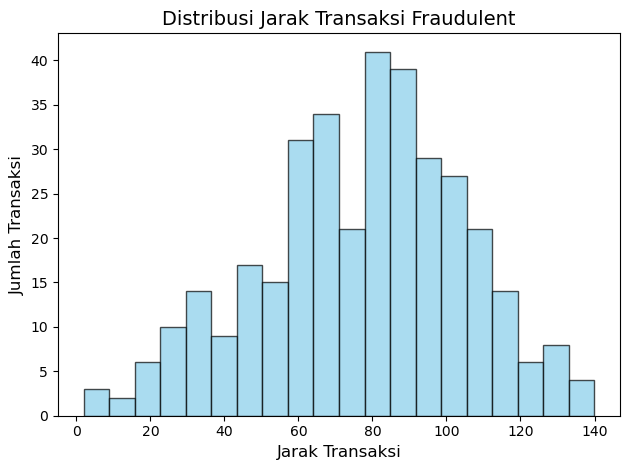

In [26]:
df_distance_fraud = df[df['is_fraud']==1]['transaction_distance']
plt.hist(df_distance_fraud, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribusi Jarak Transaksi Fraudulent', fontsize=14)
plt.xlabel('Jarak Transaksi', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

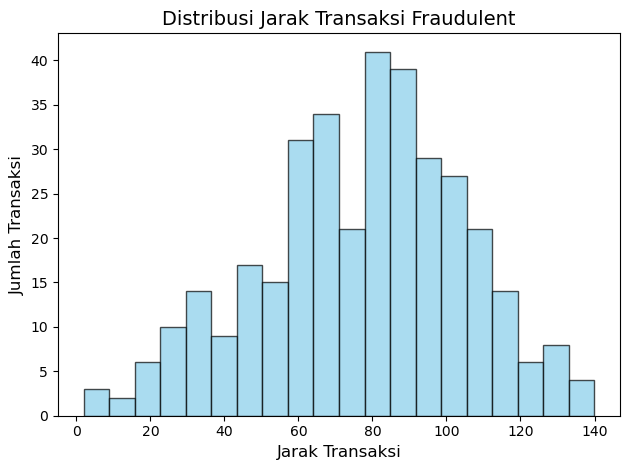

In [27]:
df_not_distance_fraud = df[df['is_fraud']==0]['transaction_distance']
plt.hist(df_distance_fraud, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribusi Jarak Transaksi Fraudulent', fontsize=14)
plt.xlabel('Jarak Transaksi', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
# Mann-Whitney U test
u_stat, u_p_value = mannwhitneyu(df_distance_fraud, df_not_distance_fraud)

print(f'U-Statistic: {u_stat}')
print(f'P-Value: {u_p_value}')

if u_p_value < 0.05:
    print("Perbedaan jarak transaksi fraud dan non-fraud signifikan.")
else:
    print("Tidak ada perbedaan signifikan antara jarak transaksi fraud dan non-fraud.")


U-Statistic: 11506098.0
P-Value: 0.5882205955113617
Tidak ada perbedaan signifikan antara jarak transaksi fraud dan non-fraud.


Berdasarkan visualisasi grafik adanya kemiripan range distribusi jumlah transaksi terbanyak dan keduanya juga tidak ada perbedaan signifikan antara jarak transaksi yang fraud dan non-fraud

### Amount

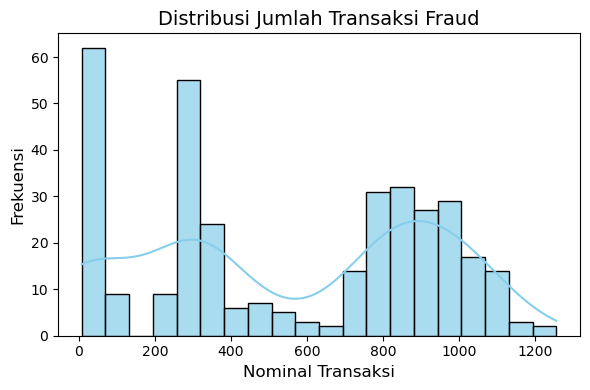

In [29]:
amt_fraud = df1[df1['is_fraud'] == 1]['amt']

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(6,4))
sns.histplot(amt_fraud, bins=20, color='skyblue', edgecolor='black', alpha=0.7, kde=True)
plt.title('Distribusi Jumlah Transaksi Fraud', fontsize=14)
plt.xlabel('Nominal Transaksi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Dari visualisasi grafis, terlihat bahwa transaksi fraud terjadi pada transaksi dengan nominal kecil yaitu sekitar 50 usd, lalu disekitar 300 usd dan 1000 usd. Ini bisa menunjukkan dua strategi berbeda yang digunakan oleh fraudster untuk transaksi yang kecil dan besar.

### Month and Day

In [30]:
df1['day_of_week'] = df1['date'].dt.day_name()
day_fraud = df1[df1['is_fraud']==1]['day_of_week']
day_fraud_count = day_fraud.value_counts(normalize=True)*100
day_fraud_count




day_of_week
Saturday     17.663818
Monday       17.094017
Tuesday      16.239316
Sunday       14.245014
Thursday     12.820513
Friday       12.250712
Wednesday     9.686610
Name: proportion, dtype: float64

Jika dilihat dari day_of_week, proporsi transaksi fraud terbesar adalah transaksi di hari Sabtu. Senin memiliki proporsi penipuan tertinggi kedua, sedangkan Minggu juga relatif tinggi. Penipuan mungkin lebih umum pada awal minggu atau akhir pekan

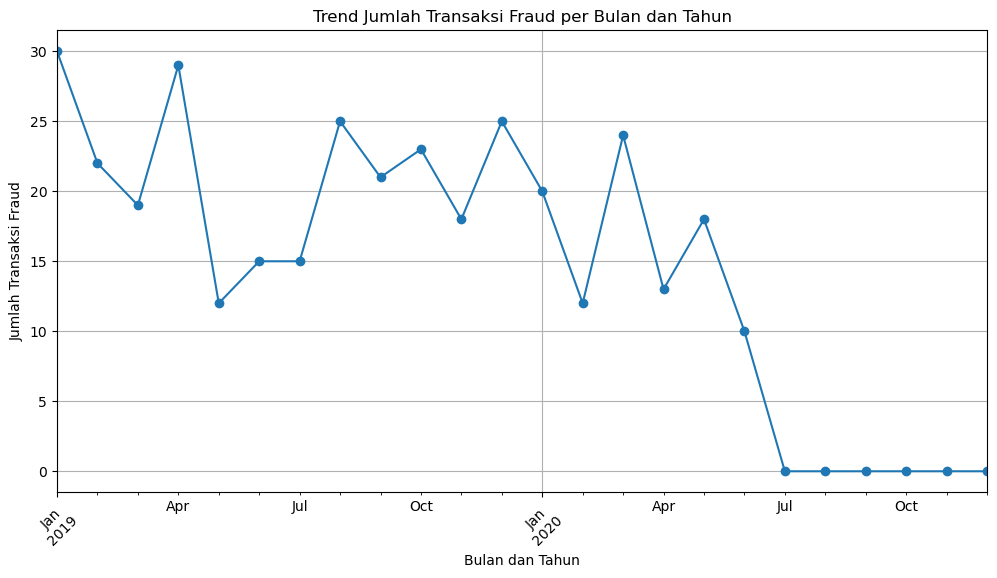

In [31]:
df1['month_year'] = df1['date'].dt.to_period('M')
fraud_df = df1[df1['is_fraud'] == 1]
monthly_fraud_trend = fraud_df.groupby('month_year').size().reindex(pd.period_range('2019-01', '2020-12', freq='M'), fill_value=0)
plt.figure(figsize=(12, 6))
monthly_fraud_trend.plot(kind='line', marker='o')
plt.title('Trend Jumlah Transaksi Fraud per Bulan dan Tahun')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Transaksi Fraud')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [32]:
df1.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
type_cat                         object
date                     datetime64[ns]
age                               int32


### Hour

In [33]:
df1['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')
df1['hour'] = df1['trans_date_trans_time'].dt.hour

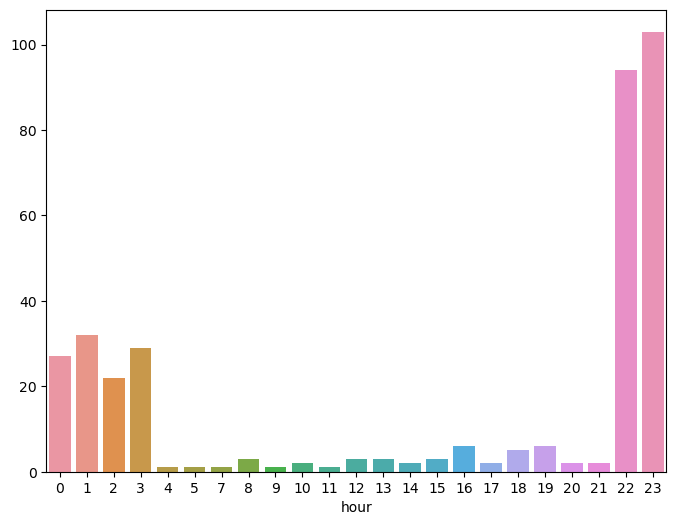

In [34]:
hour_fraud = df1[df1['is_fraud']==1]['hour']
hour_fraud_count = hour_fraud.value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(x = hour_fraud_count.index, y = hour_fraud_count.values)
plt.show()

Dari barplot, terlihat bahwa kejadian fraud paling tinggi terjadi pada jam 22 dan 23. Ini menunjukkan bahwa pelaku fraud lebih aktif pada malam hari, khususnya pada dua jam terakhir sebelum tengah malam.

### Merchant

In [35]:
df1_merchant = df1[df1['is_fraud']==1]['merchant']
df1_merchant_count = df1_merchant.value_counts()
df1_merchant_count_sorted = df1_merchant_count.sort_values(ascending=False)
df1_merchant_count_sorted.head(10)

merchant
fraud_Cormier LLC                      6
fraud_Schmidt and Sons                 5
fraud_Reichert, Shanahan and Hayes     5
fraud_Medhurst PLC                     4
fraud_Gleason-Macejkovic               4
fraud_Goldner, Kovacek and Abbott      4
fraud_Metz-Boehm                       4
fraud_Mosciski, Ziemann and Farrell    4
fraud_Koepp-Parker                     4
fraud_Streich, Dietrich and Barton     4
Name: count, dtype: int64

Fokus ke merchant-merchant yang memiliki jumlah transaksi >5 tingkat fraud diantaranya :
- fraud_Cormier LLC                   
- fraud_Kilback LLC                   
- fraud_Goldner, Kovacek and Abbott    
- fraud_Kuhic, Bins and Pfeffer        
- fraud_Kozey-Boehm                  
- fraud_Schmidt and Sons               
- fraud_Kuhn LLC                      
- fraud_Bradtke PLC                   
- fraud_Reichert, Shanahan and Hayes  

## D. Data Preprocessing


### D.1 Missing Value


#### Pengecekan missing value


In [36]:
missing_value = df.isna().sum()
missing_value

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
transaction_distance     0
dtype: int64

Dalam dataset ini tidak terdapat missing value

### D.2 Mengubah Tipe Data


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64834 entries, 94102 to 77655
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  64834 non-null  object 
 1   cc_num                 64834 non-null  int64  
 2   merchant               64834 non-null  object 
 3   category               64834 non-null  object 
 4   amt                    64834 non-null  float64
 5   first                  64834 non-null  object 
 6   last                   64834 non-null  object 
 7   gender                 64834 non-null  object 
 8   street                 64834 non-null  object 
 9   city                   64834 non-null  object 
 10  state                  64834 non-null  object 
 11  zip                    64834 non-null  int64  
 12  lat                    64834 non-null  float64
 13  long                   64834 non-null  float64
 14  city_pop               64834 non-null  int64  
 15  job

Dari fitur tersebut diketahui bahwa ada tipe data yg tidak sesuai diantaranya :
- trans_date_trans_time  seharusnya datetime
- dob seharusnya datetime


In [38]:
# Mengkonversi jadi datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')
df['dob'] = pd.to_datetime(df['dob'])

In [39]:
# Memisahkan trans_date_trans_time menjadi 2 fitur yang berbeda
df['date'] = df['trans_date_trans_time'].dt.date
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['trans_date_trans_time'].dt.hour

In [40]:
# Membuat fitu date jadi month dan day
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [41]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
transaction_distance            float64
date                     datetime64[ns]
hour                              int32


### D.3 Inconsistent Variable


In [42]:
cek_data = ['cc_num','merchant', 'category', 'gender', 'job']
for i in cek_data:
    jml = df[i].unique()
    print(f"- {i} sebanyak {len(jml)}\n" )
    print(f" {jml} \n")

- cc_num sebanyak 932

 [    374497717543058    4428154703770710     213148039875802
    2283743876903625 4798937978667559470    6538891242532018
    4998109455173950         60422928733     377264520876399
    4070511711385545    3596217206093829    6011948324228984
    4904681492230012     377234009633447    3502088871723054
 4244953610136705533      30118423745458    3531129874770000
        580954173374       4990494243023      30030380240193
    4922710831011201 4292902571056973207     213155997615567
    4170689372027579 4503101193493052864    4239552724014407
    4423489490781412    3565996340207976    4451952084362894
     377113842678100      30230540139182     213174467670432
    3567697931646329     372509258176510      30487648872433
    3533800906065217      30266994494236 4584931703207308232
 4512828414983801773    5540636818935089    6011504998544485
     213124978348176    3558652751678952    4424338559877976
      36721445180895    3547574373318979    4826655832045236


In [43]:
# Mengecek data cc_num
df['digit_cc']= df['cc_num'].astype(str).apply(len)
length_digit_cc = df['digit_cc'].value_counts().reset_index()
length_digit_cc

,digit_cc,count
0,16,32516
1,15,10803
2,14,6319
3,19,5889
4,12,4542
5,13,4447
6,11,318


In [44]:
digit_13 = df[df['digit_cc']==13]
first_digit = digit_13['cc_num'].astype(str).str[0]
unique_digit = first_digit.unique()
print(f"Digit unik awal = {unique_digit}")

Digit unik awal = ['4']


In [45]:
digit_19 = df[df['digit_cc']==13]
first_digit2 = digit_13['cc_num'].astype(str).str[0]
unique_digit2 = first_digit2.unique()
print(f"Digit unik awal = {unique_digit2}")

Digit unik awal = ['4']


In [46]:
df['cc_num'].dtypes

dtype('int64')

Terdapat kartu kredit yg digitnya = 11 dan 12. Berdasarkan Issuer Identifier Number untuk nomor kartu kredit dimulai dari 13 digit sampai 19 digit. Oleh karena itu untuk kartu kredit yang digitnya dibawah 13 akan dihapus.

[Sumber](https://en.wikipedia.org/wiki/Payment_card_number#Issuer_identification_number_(IIN))

In [47]:
# Menghapus Kartu Kredit yang digitnya 11
df = df.drop((df[df['digit_cc'] < 13]).index, axis = 0)

### D.4 Data Duplikat


In [48]:
df.duplicated().sum() 

0

Tidak ada data duplikat 

### D.5 Feature Binning

#### Pengelompokkan Waktu

Untuk kolom hour akan dilakukan pengkategorian berdasarkan range waktu dengan pembagian:
- Early Morning: 00:00 - 03:59
- Morning: 04:00 - 07:59
- Late Morning: 08:00 - 11:59
- Afternoon: 12:00 - 15:59
- Evening: 16:00 - 19:59
- Night: 20:00 - 23:59


In [49]:
bins = [0,4,8,12,16,20,24]
labels = ["Early Morning", "Morning", "Late Morning", "Afternoon", "Evening", "Night"]
df["time_of_day"] = pd.cut(df["hour"], labels = labels, bins=bins, right = False)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,transaction_distance,date,hour,month,day,digit_cc,time_of_day
94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,46.398331,-99.813959,0,113.807218,2019-02-25,8,2,25,15,Late Morning
198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,...,45.687331,-117.488135,0,103.347068,2019-04-12,19,4,12,16,Evening
1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,...,27.254081,-81.974799,0,84.152395,2020-05-31,21,5,31,15,Night
619078,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.551957,-83.374265,0,100.345987,2019-09-20,17,9,20,16,Evening
573850,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,Bay City,...,43.032957,-83.521294,0,72.935362,2019-08-31,23,8,31,19,Night


#### Pengelompokkan Umur

In [50]:

df['age'] = df['date'].dt.year - df['dob'].dt.year - (
    (df['date'].dt.month < df['dob'].dt.month) |
    ((df['date'].dt.month == df['dob'].dt.month) & (df['date'].dt.day < df['dob'].dt.day))
)

Untuk usia akan dilakukan pengkategorian berikut :
- Teenager: 0 - 17
- Young Adult: 18 - 34
- Adult: 35 - 49
- Senior: 50 - 64
- Elderly: 65+

In [51]:
bins = [0,18,35,50,65,100]
labels = ["Teenager", "Young Adult", "Adult", "Senior", "Elderly"]

df["age_group"] = pd.cut(df["age"], labels=labels, bins=bins, right=False)
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'transaction_distance', 'date', 'hour',
       'month', 'day', 'digit_cc', 'time_of_day', 'age', 'age_group'],
      dtype='object')

#### Pengelompokkan Merchant

In [52]:
# Pengelompokkan Merchant 
merchant_fraud_counts = df.groupby('merchant')['is_fraud'].sum()
merchant_total_counts = df.groupby('merchant')['is_fraud'].count()
merchant_fraud_rate = merchant_fraud_counts/merchant_total_counts
merchant_fraud_rate

merchant
fraud_Abbott-Rogahn                 0.000000
fraud_Abbott-Steuber                0.011111
fraud_Abernathy and Sons            0.000000
fraud_Abshire PLC                   0.012658
fraud_Adams, Kovacek and Kuhlman    0.020408
                                      ...   
fraud_Zemlak Group                  0.016949
fraud_Zemlak, Tillman and Cremin    0.000000
fraud_Ziemann-Waters                0.000000
fraud_Zieme, Bode and Dooley        0.000000
fraud_Zulauf LLC                    0.000000
Name: is_fraud, Length: 693, dtype: float64

In [53]:
q1 = merchant_fraud_rate.quantile(0.25)
q2 = merchant_fraud_rate.quantile(0.5)
q3 = merchant_fraud_rate.quantile(0.75)
q1,q2,q3

(0.0, 0.0, 0.009174311926605505)

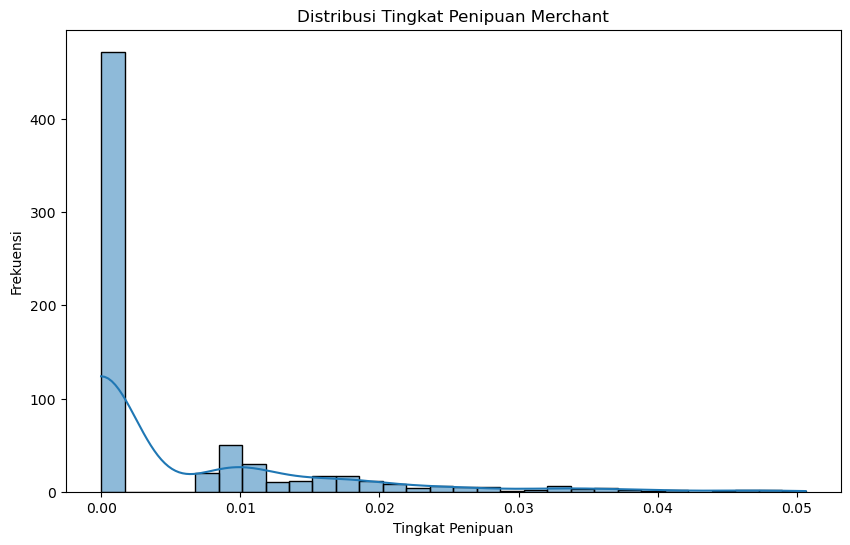

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(merchant_fraud_rate, bins=30, kde=True)
plt.title('Distribusi Tingkat Penipuan Merchant')
plt.xlabel('Tingkat Penipuan')
plt.ylabel('Frekuensi')
plt.show()

In [55]:
def risk_level(prop):
    if prop == 0:  
        return 'Low Risk'
    elif prop < 0.8: 
        return 'High Risk'
    elif prop >= 0.8:
        return 'Very High Risk'
merchant_fraud_risk = merchant_fraud_rate.apply(risk_level)
df['merchant_fraud_risk'] = df['merchant'].map(merchant_fraud_risk)
df['merchant_fraud_risk'].unique()

array(['Low Risk', 'High Risk'], dtype=object)

#### Pengelompokkan Job

In [56]:
categories = {
    'Engineering and Technology': ['engineer', 'developer', 'programmer', 'technician', 'systems', 'communications'],
    'Healthcare and Medical': ['nurse', 'doctor', 'therapist', 'psychologist', 'pharmacist', 'surgeon', 'physiotherapist'],
    'Education and Research': ['teacher', 'lecturer', 'professor', 'scientist', 'researcher', 'education', 'advisor', 'trainer'],
    'Finance and Business': ['accountant', 'financial', 'trader', 'broker', 'consultant', 'manager', 'executive', 'officer', 'auditor'],
    'Arts and Media': ['designer', 'artist', 'editor', 'producer', 'director', 'photographer', 'writer', 'journalist', 'animator', 'curator']
}


def categorize_job(job):
    job_lower = job.lower()
    for category, keywords in categories.items():
        if any(keyword in job_lower for keyword in keywords):
            return category
    return 'Others'

df['cat_job'] = df['job'].apply(categorize_job)
df['cat_job'].unique()

array(['Arts and Media', 'Finance and Business', 'Education and Research',
       'Engineering and Technology', 'Others', 'Healthcare and Medical'],
      dtype=object)

#### Pengelompokkan City

In [57]:
import pandas as pd

# Menghitung total transaksi dan transaksi fraud di setiap kota
city_fraud = df.groupby('city')['is_fraud'].agg(['sum', 'count']).reset_index()
city_fraud.columns = ['city', 'fraud_count', 'total_count']

# Menghitung persentase fraud per kota
city_fraud['fraud_percentage'] = (city_fraud['fraud_count'] / city_fraud['total_count']) * 100

# Mengategorikan berdasarkan persentase fraud
def categorize_city_by_fraud_percentage(percentage):
    if percentage > 2:  # Contoh: lebih dari 2% dianggap High Fraud Risk
        return 'High Fraud Risk'
    elif 1 < percentage <= 2:  # 1% hingga 2% dianggap Medium Fraud Risk
        return 'Medium Fraud Risk'
    elif 0.5 < percentage <= 1:  # 0.5% hingga 1% dianggap Low Fraud Risk
        return 'Low Fraud Risk'
    elif 0 < percentage <= 0.5:  # 0% hingga 0.5% dianggap Very Low Fraud Risk
        return 'Very Low Fraud Risk'
    else:
        return 'No Fraud Risk'  # 0% dianggap No Fraud Risk

city_fraud['city_fraud_risk'] = city_fraud['fraud_percentage'].apply(categorize_city_by_fraud_percentage)

# Memasukkan kategori risiko ke dalam df utama
df = df.merge(city_fraud[['city', 'city_fraud_risk']], on='city', how='left')

# Mengisi nilai NaN dengan 'No Fraud Risk' untuk kota yang tidak ada transaksi fraud
df['city_fraud_risk'].fillna('No Fraud Risk', inplace=True)

# Menampilkan hasil kategori risiko fraud
print(df['city_fraud_risk'].value_counts())


city_fraud_risk
No Fraud Risk          39676
Low Fraud Risk          8338
Medium Fraud Risk       6986
High Fraud Risk         3595
Very Low Fraud Risk     1379
Name: count, dtype: int64


#### Pengelompokkan State


In [58]:
fraud_counts_state = df[df['is_fraud'] == 1]['state'].value_counts()
num_unique_state = fraud_counts_state.unique()
print(num_unique_state)

[28 20 16 13 12 11 10  9  8  7  6  5  4  3  2  1]


In [59]:
q1 = fraud_counts_state.quantile(0.25)
q2 = fraud_counts_state.quantile(0.50)
q3 = fraud_counts_state.quantile(0.75)
q1,q2,q3

(3.0, 5.0, 9.0)

In [60]:
def categorize_state_by_fraud(count):
    if count >= q3:
        return 'High Fraud Risk'
    elif count >= q2:
        return 'Medium Fraud Risk'
    elif count >= q1:
        return 'Low Fraud Risk'
    else:
        return 'Very Low Fraud Risk'

In [61]:
state_fraud_risk = fraud_counts_state.apply(categorize_state_by_fraud)
df['state_fraud_risk'] = df['state'].map(state_fraud_risk)
df['state_fraud_risk'].fillna('No Fraud Risk', inplace=True)
print(df['state_fraud_risk'].unique())

['Very Low Fraud Risk' 'Medium Fraud Risk' 'High Fraud Risk'
 'Low Fraud Risk' 'No Fraud Risk']


#### Pengelompokkan Category

In [62]:
def categorize_category(category):
    if category == 'grocery_net':
        return 'Everyday Needs - Online'
    elif category == 'grocery_pos':
        return 'Everyday Needs - Offline'
    elif category in ['home', 'food_dining', 'personal_care', 'kids_pets']:
        return 'Everyday Needs - Offline'
    elif category in ['health_fitness', 'entertainment', 'travel']:
        return 'Entertainment and Recreation'
    elif category in ['shopping_net', 'misc_net']:
        return 'Shopping - Online'
    elif category in ['shopping_pos', 'gas_transport', 'misc_pos']:
        return 'Shopping - Offline'
    else:
        return 'Others'

# Terapkan fungsi kategori ke DataFrame
df['category_group'] = df['category'].map(categorize_category)

# Cek hasil kategori
print(df['category_group'].unique())

['Everyday Needs - Online' 'Everyday Needs - Offline' 'Shopping - Online'
 'Entertainment and Recreation' 'Shopping - Offline']


In [63]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'transaction_distance', 'date', 'hour',
       'month', 'day', 'digit_cc', 'time_of_day', 'age', 'age_group',
       'merchant_fraud_risk', 'cat_job', 'city_fraud_risk', 'state_fraud_risk',
       'category_group'],
      dtype='object')

In [64]:
# Kolom yg sebelum dikategorikan dihapus merchant, age, category, city, job, dob, hour
df.drop(columns=['merchant', 'age', 'category', 'city', 'job', 'dob', 'hour'], inplace=True)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59974 entries, 0 to 59973
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  59974 non-null  datetime64[ns]
 1   cc_num                 59974 non-null  int64         
 2   amt                    59974 non-null  float64       
 3   first                  59974 non-null  object        
 4   last                   59974 non-null  object        
 5   gender                 59974 non-null  object        
 6   street                 59974 non-null  object        
 7   state                  59974 non-null  object        
 8   zip                    59974 non-null  int64         
 9   lat                    59974 non-null  float64       
 10  long                   59974 non-null  float64       
 11  city_pop               59974 non-null  int64         
 12  trans_num              59974 non-null  object        
 13  u

### D.7 Outlier


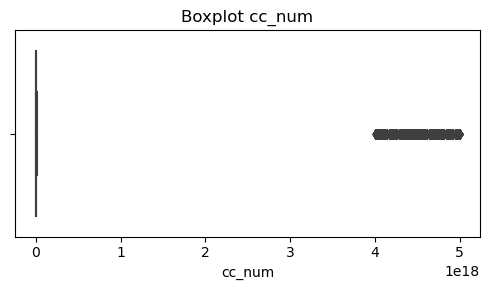

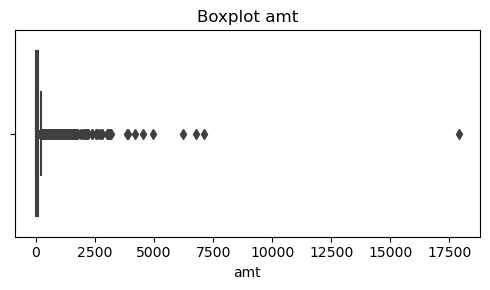

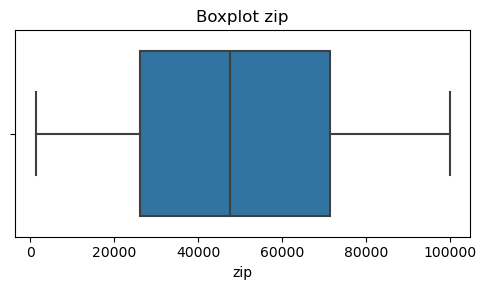

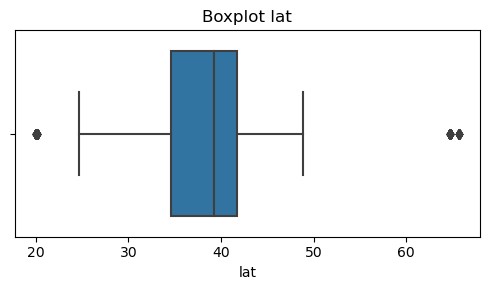

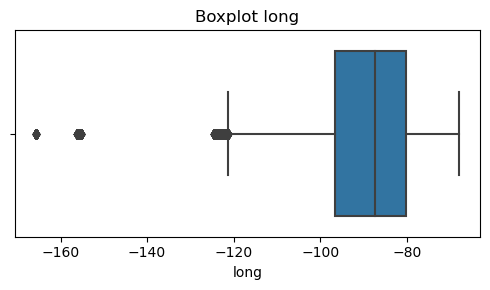

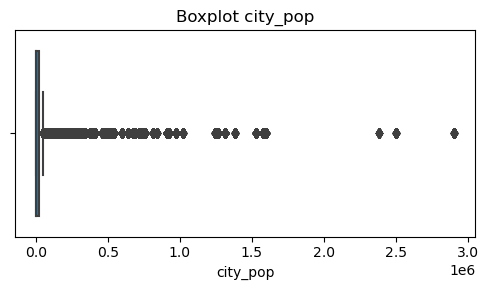

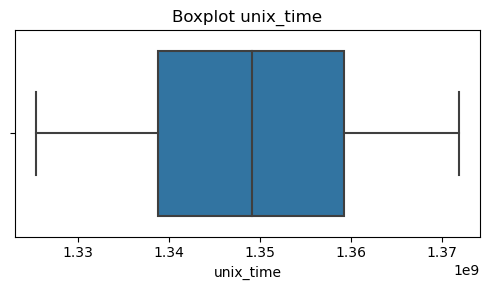

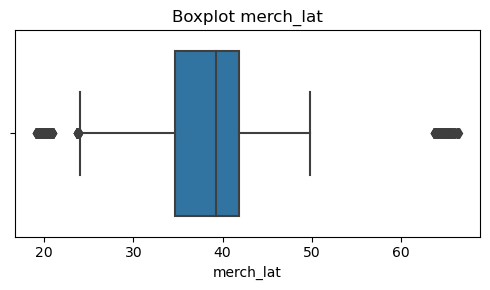

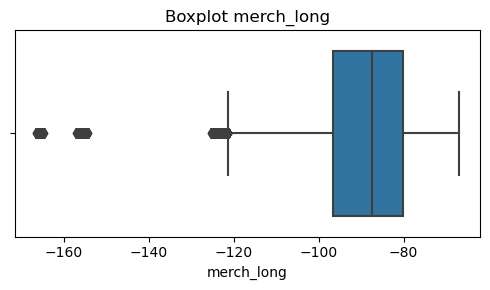

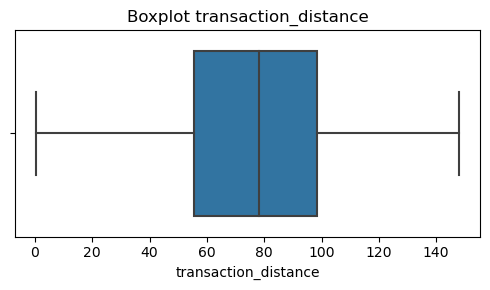

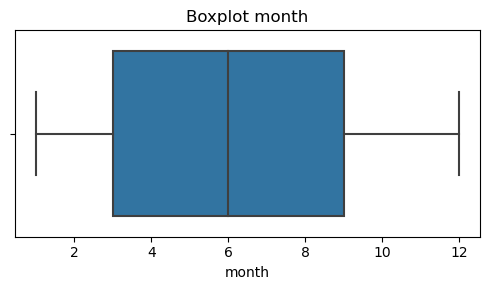

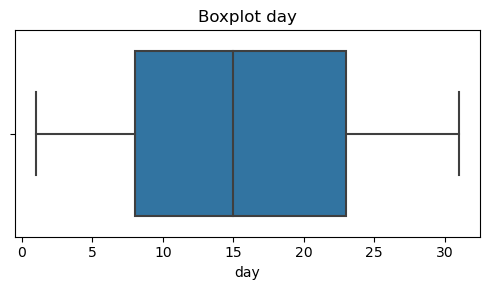

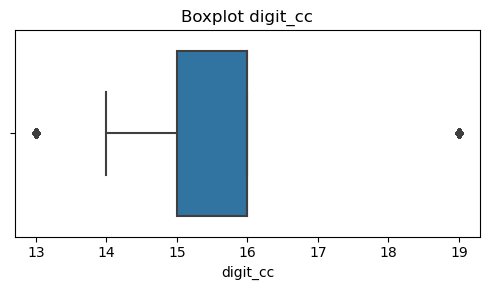

In [66]:
col_numeric = df.select_dtypes(include= ['int', 'float']).drop(columns=['is_fraud']).columns
for col in col_numeric:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
    plt.show()

In [67]:
df[df['amt']> 10000]['amt'].count()

1

In [68]:
#outlier ekstrim ini akan dihapus
df = df.loc[df['amt'] <= 10000]
df = df.query('amt <= 10000')


### D.8 Data correlation


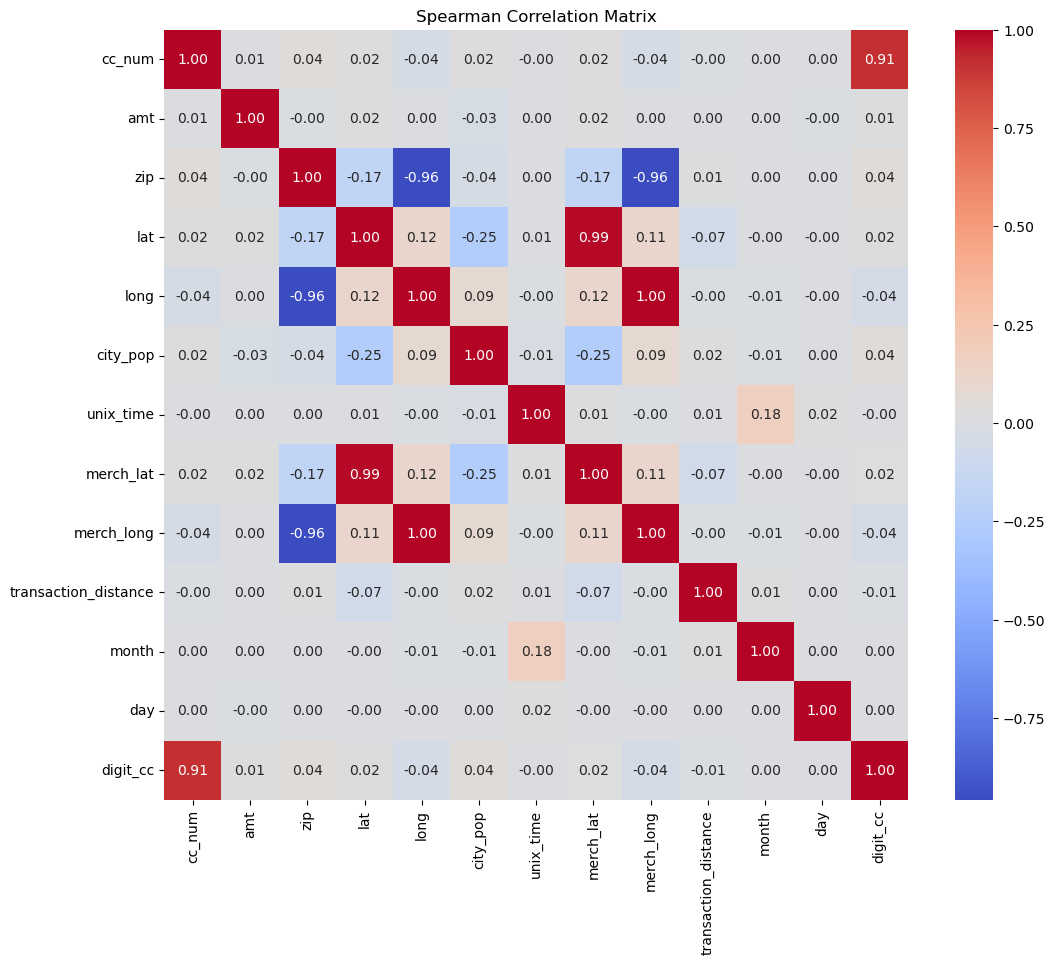

In [69]:
col_numeric = df.select_dtypes(include=['int', 'float']).drop(columns=['is_fraud'])
corr_matrix_spearman = col_numeric.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


Berdasarkan visualisasi heatmap diatas, ada beberapa kolom yang memiliki korelasi kuat diantaranya :
- digit_cc >< cc_num : 0.91
- zip >< merch_long : -0.96
- merch_lat >< lat : 0.99
- merch_long >< long : 1
- zip >< long : -0.96

### D.9 Feature Selection

In [70]:
#Numerik
fraud = df[df['is_fraud'] == 1]
not_fraud = df[df['is_fraud'] == 0]

mean_test_results = {}

# Loop through columns and perform Mann-Whitney U test
for column in df.select_dtypes(include=['float64', 'int64', 'int32']):
    if column != 'is_fraud':
        stat, p = mannwhitneyu(fraud[column].dropna(), not_fraud[column].dropna())
        mean_test_results[column] = p

# Create DataFrame from mean test results
mean_test_df = pd.DataFrame(mean_test_results.items(), columns=['Feature', 'p-value'])

# Add interpretation column
alpha = 0.05
mean_test_df['Interpretation'] = mean_test_df['p-value'].apply(lambda x: 'Significant' if x < alpha else 'Not significant')

# Display the DataFrame
mean_test_df

,Feature,p-value,Interpretation
0,cc_num,1.256336e-01,Not significant
1,amt,2.519790e-115,Significant
2,zip,2.488965e-01,Not significant
3,lat,8.402349e-02,Not significant
4,long,2.538785e-01,Not significant
5,city_pop,6.762762e-01,Not significant
6,unix_time,2.448812e-02,Significant
7,merch_lat,7.097232e-02,Not significant
8,merch_long,2.634977e-01,Not significant
9,transaction_distance,3.374301e-01,Not significant


In [71]:
#Kategorik
chi_square_results = {}
for column in df.select_dtypes(include=['object', 'category','datetime64']).columns:
        contingency_table = pd.crosstab(df[column], df['is_fraud'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results[column] = {'Chi-square': chi2, 'p-value': p}
chi_square_results_df = pd.DataFrame(chi_square_results).T
alpha = 0.05
chi_square_results_df['Interpretation'] = chi_square_results_df['p-value'].apply(lambda x: 'Significant' if x < alpha else 'Not significant')
chi_square_results_df

,Chi-square,p-value,Interpretation
trans_date_trans_time,59973.000000,4.406964e-01,Not significant
first,1429.782600,3.783952e-137,Significant
last,2103.641040,1.332292e-212,Significant
gender,2.065993,1.506168e-01,Not significant
street,5720.395561,0.000000e+00,Significant
state,301.944130,1.021015e-37,Significant
trans_num,59973.000000,4.980802e-01,Not significant
date,754.380355,1.321695e-09,Significant
time_of_day,455.310914,3.512614e-96,Significant
age_group,7.640703,1.056626e-01,Not significant


Ada beberapa fitur tidak signifikan namun tetap dipertimbangkan masuk kepemodelan machine learning karena memiliki potensi untuk berkontribusi ke pemodelan seperti `city_pop` dan `transaction_distance`
Beberapa fitur lainnya yang tidak digunakan diantaranya :
1. **`cc_num`**: Nomor kartu kredit tidak memberikan informasi yang berarti untuk deteksi penipuan karena bersifat unik untuk setiap transaksi.
2. **`lat`, `long`, `merch_lat`, `merch_long`**: Fitur geografis ini memiliki korelasi yang sangat tinggi dan dapat menyebabkan multikolinearitas. 
3. **`unix_time`**: Informasi waktu UNIX sudah diwakili oleh fitur tanggal, sehingga fitur ini menjadi redundan.
4. **`digit_cc`**: Fitur ini dibuat untuk memfilter data kartu kredit yang tidak sesuai dan tidak memberikan informasi tambahan setelah pembersihan data.
5. **`trans_num`**: Nomor transaksi adalah pengenal unik dan tidak memiliki hubungan yang berarti dengan target penipuan.
6. **`street`, `first`, `last`**: Meskipun signifikan secara statistik, fitur ini tidak relevan secara praktis dan dapat menimbulkan masalah privasi.
8. **`trans_date_trans_time`** : Sudah ada fitur date
9. **`date`** : Sudah ada fitur month dan day 
10. **`zip`** : Tidak signifikan dan ada fitur lain seperti city dan state
11. **`day`** : Tidak signifikan


Setelah menghapus fitur-fitur yang tidak relevan, RFE digunakan untuk melakukan seleksi fitur lebih lanjut.

In [72]:
df = df.drop(columns = ['cc_num','lat','long','merch_lat','merch_long', 'unix_time','digit_cc', 'trans_num','street', 'first','last', 'street',
             'trans_date_trans_time','date','zip', 'day'], axis = 1)

In [73]:
df = df.drop(columns ='state', axis = 1)

Kolom yang masuk keproses berikutnya adalah : 
 `amt`, `gender`,  `city_pop`, `transaction_distance`,  `month`, `time_of_day`, `age_group` ,`merchant_fraud_risk`, `cat_job`, `city_fraud_risk`, `state_fraud_risk`, `category_group` 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59973 entries, 0 to 59973
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   amt                   59973 non-null  float64 
 1   gender                59973 non-null  object  
 2   city_pop              59973 non-null  int64   
 3   is_fraud              59973 non-null  int64   
 4   transaction_distance  59973 non-null  float64 
 5   month                 59973 non-null  int32   
 6   time_of_day           59973 non-null  category
 7   age_group             59973 non-null  category
 8   merchant_fraud_risk   59973 non-null  object  
 9   cat_job               59973 non-null  object  
 10  city_fraud_risk       59973 non-null  object  
 11  state_fraud_risk      59973 non-null  object  
 12  category_group        59973 non-null  object  
dtypes: category(2), float64(2), int32(1), int64(2), object(6)
memory usage: 5.4+ MB


### D.11 Encoding

In [75]:
ordinal_mapping = [
    {"col": "age_group", "mapping": {"Teenager": 1, "Young Adult": 2, "Adult": 3, "Senior": 4, "Elderly": 5}},
    {"col": "time_of_day", "mapping": {"Early Morning": 1, "Morning": 2, "Late Morning": 3, "Afternoon": 4,
                                       "Evening": 5, "Night": 6}},
    {"col": "merchant_fraud_risk", "mapping": {"Low Risk": 1, "High Risk": 2}},
    {"col": "city_fraud_risk", "mapping": {"No Fraud Risk": 1, "Very Low Fraud Risk": 2, "Low Fraud Risk": 3,
                                            "Medium Fraud Risk": 4, "High Fraud Risk": 5}},
    {"col": "state_fraud_risk", "mapping": {"No Fraud Risk": 1, "Very Low Fraud Risk": 2, "Low Fraud Risk": 3,
                                             "Medium Fraud Risk": 4, "High Fraud Risk": 5}}
]

# Define the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), ['gender', 'cat_job', 'category_group']),
        ('ordinal', ce.OrdinalEncoder(cols=['age_group', 'time_of_day', 'merchant_fraud_risk', 'city_fraud_risk', 'state_fraud_risk'],
                                      mapping=ordinal_mapping), ['age_group', 'time_of_day', 'merchant_fraud_risk', 'city_fraud_risk', 'state_fraud_risk'])
    ],
    remainder='passthrough'
)

In [81]:
# Split features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)




X_train_transformed = transformer.fit_transform(X_train)
feature_names = transformer.get_feature_names_out()
transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
print(transformed_df.columns)

Index(['one_hot__gender_M', 'one_hot__cat_job_Education and Research',
       'one_hot__cat_job_Engineering and Technology',
       'one_hot__cat_job_Finance and Business',
       'one_hot__cat_job_Healthcare and Medical', 'one_hot__cat_job_Others',
       'one_hot__category_group_Everyday Needs - Offline',
       'one_hot__category_group_Everyday Needs - Online',
       'one_hot__category_group_Shopping - Offline',
       'one_hot__category_group_Shopping - Online', 'ordinal__age_group',
       'ordinal__time_of_day', 'ordinal__merchant_fraud_risk',
       'ordinal__city_fraud_risk', 'ordinal__state_fraud_risk',
       'remainder__amt', 'remainder__city_pop',
       'remainder__transaction_distance', 'remainder__month'],
      dtype='object')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


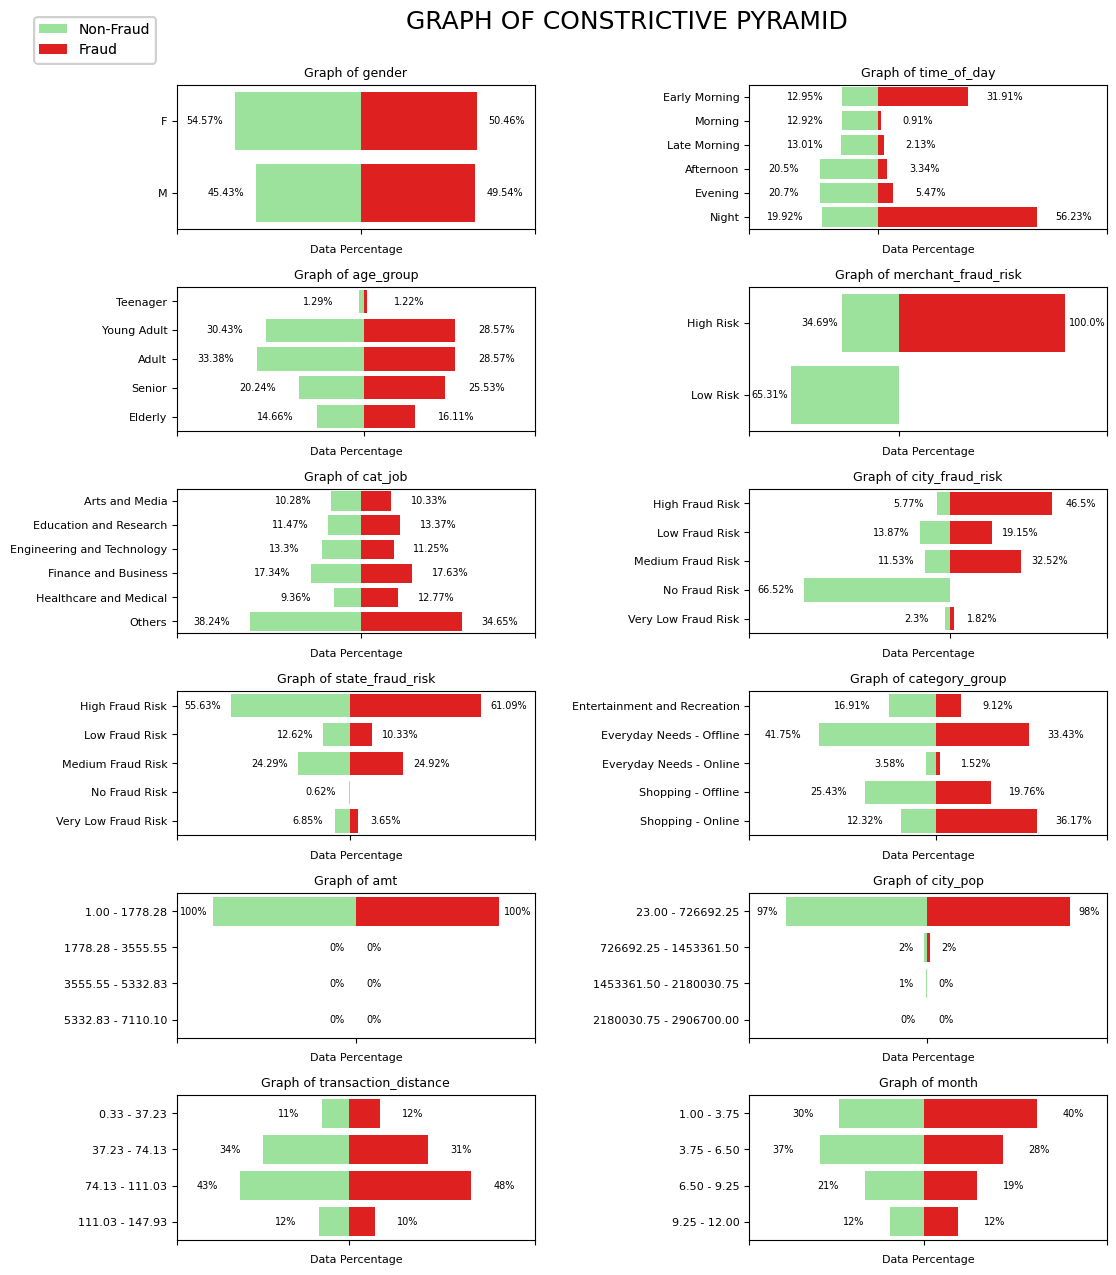

In [82]:
plt.figure(figsize=(12, 15))
category = ['gender','time_of_day', 'age_group', 'merchant_fraud_risk', 'cat_job', 'city_fraud_risk', 'state_fraud_risk', 'category_group']
numeric = ['amt', 'city_pop', 'transaction_distance' , 'month']
columns= ['gender','time_of_day', 'age_group', 'merchant_fraud_risk', 'cat_job', 'city_fraud_risk', 'state_fraud_risk', 'category_group', 'amt', 'city_pop', 'transaction_distance' , 'month']

for i, col in enumerate(columns, start=1):
    plt.subplot(6, 2, i)
    if col in category:
        data_category = df.groupby([col, 'is_fraud']).size().reset_index(name='Count')
        pivot = pd.pivot_table(data_category, values='Count', index=col, columns='is_fraud', aggfunc='sum').reset_index()
        pivot = pivot.rename(columns={col: 'label_data'})
        pivot['0(%)'] = round(pivot[0] / pivot[0].sum() * -100, 2)
        pivot['1(%)'] = round(pivot[1] / pivot[1].sum() * 100, 2)
        sns.barplot(x='0(%)', y='label_data', data=pivot, color="lightgreen", label='Non-Fraud')
        sns.barplot(x='1(%)', y='label_data', data=pivot, color="red", label='Fraud')
        plt.title(f'Graph of {col}', fontsize=9)
        plt.tick_params(axis='y', labelsize=8)
        plt.ylabel('', fontsize=4)
        plt.xlabel('Data Percentage', fontsize=8)
        plt.legend(loc='upper left', bbox_to_anchor=(0, 0.93), bbox_transform=plt.gcf().transFigure)
        for index, row in pivot.iterrows():
            plt.text(row['0(%)'] - 13, index, f'{row["0(%)"]*-1}%', color='black', ha="center", va='center', fontsize=7)
            plt.text(row['1(%)'] + 13, index, f'{row["1(%)"]}%', color='black', ha="center", va='center', fontsize=7)

        plt.xticks(ticks=[pivot['0(%)'].min()-25, 0, pivot['1(%)'].max()+25], labels=[])
        plt.grid(False)
    
    elif col in numeric:
        feature = df[col]
        fraud = df['is_fraud']

        interval_length = (max(feature) - min(feature)) / 4
        intervals = [(min(feature) + i * interval_length, min(feature) + (i + 1) * interval_length) for i in range(4)]

        freq_0, freq_1 = [0] * 4, [0] * 4

        for item, c in zip(feature, fraud):
            for i, (lower, upper) in enumerate(intervals):
                if lower <= item < upper:
                    freq_0[i] += 1 if c == 0 else 0
                    freq_1[i] += 1 if c == 1 else 0
                    break

        interval_result = pd.DataFrame({'label_data': [f"{lower:.2f} - {upper:.2f}" for lower, upper in intervals],
                                       0: freq_0, 1: freq_1})
        interval_result['0(%)'] = round(interval_result[0] / interval_result[0].sum() * -100, 0).astype(int)
        interval_result['1(%)'] = round(interval_result[1] / interval_result[1].sum() * 100, 0).astype(int)

        sns.barplot(x='0(%)', y='label_data', data=interval_result, color="lightgreen", label='Non-Fraud')
        sns.barplot(x='1(%)', y='label_data', data=interval_result, color="red", label='Fraud')

        plt.title(f'Graph of {col}', fontsize=9)
        plt.tick_params(axis='y', labelsize=8)
        plt.ylabel('', fontsize=4)
        plt.xlabel('Data Percentage', fontsize=8)
        plt.legend(loc='upper left', bbox_to_anchor=(0, 0.93), bbox_transform=plt.gcf().transFigure)

        for index, row in interval_result.iterrows():
            plt.text(row['0(%)'] - 13, index, f'{row["0(%)"]*-1}%', color='black', ha="center", va='center', fontsize=7)
            plt.text(row['1(%)'] + 13, index, f'{row["1(%)"]}%', color='black', ha="center", va='center', fontsize=7)

        plt.xticks(ticks=[interval_result['0(%)'].min()-25, 0, interval_result['1(%)'].max()+25], labels=[])
        plt.grid(False)

plt.suptitle('GRAPH OF CONSTRICTIVE PYRAMID', x=0.5, y=0.93, fontsize=18)
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.show()


## E. Modeling

In [83]:
tree = DecisionTreeClassifier(random_state=2020) 
rf = RandomForestClassifier(random_state=2020) 
xgb = XGBClassifier(random_state=2020)
lgbm = LGBMClassifier(random_state=2020)

In [84]:
models = [tree, rf, xgb, lgbm]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Define resampling
resampling = SMOTE(random_state=2020)

# Evaluate each model
score = []
mean = []
std = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator_default = ImbPipeline([
        ('preprocess', transformer),
        ('resample', resampling),
        ('model', model)
    ])
    model_cv = cross_val_score(estimator_default, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

# Results
result_df = pd.DataFrame({
    'model': model_names,
    'mean F1 score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 score', ascending=False)

print(result_df)

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

Dua model terbaik adalah XGboost dan LightGBM. Tahapan berikutnya adalah menyeleksi fitur dengan RFE

In [85]:
# SMOTE untuk XGBoost
resampling = SMOTE(random_state=2020)

# Daftar nilai n_features_to_select untuk RFE
n_features_range = range(5, 21)

# Menyimpan hasil
score = []
mean = []
std = []
model_names = []

# Evaluasi setiap model
for n_features in n_features_range:
    # Definisikan RFE dan model
    feature_selection_XGB = RFE(estimator=XGBClassifier(random_state=2020), n_features_to_select=n_features)
    model_name = f'XGB_SMOTE_FS_{n_features}'
    
    # Pipeline dengan RFE
    estimator_tuning = ImbPipeline([
        ('preprocess', transformer),
        ('resampler', resampling),
        ('feature_selector', feature_selection_XGB),
        ('model', XGBClassifier(random_state=2020))
    ])
    
    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    model_names.append(model_name)

# Hasil
results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

print(results_df.round(3))

                 mean F1 Score  StdDev
model                                 
XGB_SMOTE_FS_16          0.836   0.053
XGB_SMOTE_FS_18          0.833   0.060
XGB_SMOTE_FS_15          0.832   0.033
XGB_SMOTE_FS_14          0.829   0.039
XGB_SMOTE_FS_19          0.828   0.039
XGB_SMOTE_FS_20          0.828   0.039
XGB_SMOTE_FS_17          0.815   0.057
XGB_SMOTE_FS_13          0.807   0.064
XGB_SMOTE_FS_12          0.791   0.057
XGB_SMOTE_FS_11          0.790   0.068
XGB_SMOTE_FS_10          0.772   0.052
XGB_SMOTE_FS_8           0.765   0.039
XGB_SMOTE_FS_9           0.762   0.036
XGB_SMOTE_FS_7           0.702   0.048
XGB_SMOTE_FS_6           0.674   0.047
XGB_SMOTE_FS_5           0.526   0.199


In [86]:
# SMOTE untuk LGBM

n_features_range = range(5, 21)

# Menyimpan hasil
score = []
mean = []
std = []
model_names = []

# Evaluasi setiap model
for n_features in n_features_range:
    # Definisikan RFE dengan LightGBM
    feature_selection_LGBM = RFE(estimator=LGBMClassifier(random_state=2020), n_features_to_select=n_features)
    model_name = f'LGBM_SMOTE_FS_{n_features}'
    
    # Pipeline dengan RFE
    estimator_tuning = ImbPipeline([
        ('preprocess', transformer),
        ('resampler', resampling),
        ('feature_selector', feature_selection_LGBM),
        ('model', LGBMClassifier(random_state=2020))
    ])
    
    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    model_names.append(model_name)

# Hasil
results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

print(results_df.round(3))


[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-thre

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-thre

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-thread

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-thread

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-thread

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-threa

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-thread

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-thread

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-thre

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-thre

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33400, number of negative: 33400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66800, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of neg

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33401, number of negative: 33401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4593
[LightGBM] [Info] Number of data points in the train set: 66802, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

## Hyper Parameter Tuning: XGB


In [88]:
feature_selection_XGB = RFE(estimator=XGBClassifier(random_state=2020), n_features_to_select=16)
resampling = SMOTE(random_state=2020)

# Definisikan pipeline dan model
pipeline_tuning = ImbPipeline([
    ('preprocess', transformer),
    ('resampler', resampling),
    ('feature_selector', feature_selection_XGB),
    ('model', XGBClassifier(random_state=2020))
])

# Definisikan hyperparameter space
hyperparam_space = {    
    'model__n_estimators': [100, 300, 500], 
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.03, 0.5], 
    'model__subsample': [0.8, 0.9, 1],
}

random_search_xgb = RandomizedSearchCV(
    pipeline_tuning, 
    param_distributions=hyperparam_space, 
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1, n_iter=5
)


random_search_xgb.fit(X_train, y_train)

# Hasil
best_params = random_search_xgb.best_params_
best_score = random_search_xgb.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.3f}")

Best Parameters: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 6, 'model__learning_rate': 0.5}
Best Score: 0.837


### Evaluasi Model Sebelum Tuning

In [89]:
# XGB SEBELUM TUNING
model_default = XGBClassifier(random_state=2020)
pipeline_default = ImbPipeline([
    ('preprocess', transformer),
    ('resampler', resampling),
    ('feature_selector', RFE(estimator=model_default, n_features_to_select=16)),
    ('model', model_default)
])

pipeline_default.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_default = pipeline_default.predict(X_test)

# Hitung metrik evaluasi untuk model default
report_default_xgb = classification_report(y_test, y_pred_default)
cm_default = confusion_matrix(y_test, y_pred_default)

print('Classification Report Default XGB : \n', report_default_xgb)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17893
           1       0.86      0.72      0.78        99

    accuracy                           1.00     17992
   macro avg       0.93      0.86      0.89     17992
weighted avg       1.00      1.00      1.00     17992



In [92]:
# XGB SEBELUM TUNING
model_default = XGBClassifier(random_state=2020)
pipeline_default = ImbPipeline([
    ('preprocess', transformer),
    ('resampler', resampling),
    ('feature_selector', RFE(estimator=model_default, n_features_to_select=18)),
    ('model', model_default)
])

pipeline_default.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_default = pipeline_default.predict(X_test)

# Hitung metrik evaluasi untuk model default
report_default_xgb = classification_report(y_test, y_pred_default)
cm_default = confusion_matrix(y_test, y_pred_default)

print('Classification Report Default XGB : \n', report_default_xgb)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17893
           1       0.84      0.75      0.79        99

    accuracy                           1.00     17992
   macro avg       0.92      0.87      0.90     17992
weighted avg       1.00      1.00      1.00     17992



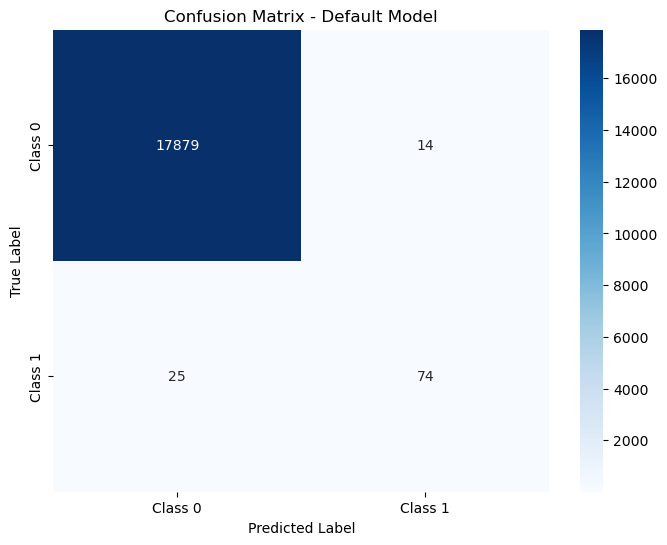

In [93]:
# Visualisasikan confusion matrix untuk model yang sudah di-tune n = 18
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Default Model')
plt.show()

### Evaluasi Model Setelah Tuning

#### XGB Tuning

In [94]:
best_model = random_search_xgb.best_estimator_

# Prediksi pada data uji dengan model yang sudah di-tune
y_pred_tuned = best_model.predict(X_test)

# Hitung metrik evaluasi untuk model yang sudah di-tune
report_tuned_xgb = classification_report(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print('Classification Report Tuned XGB : \n', report_tuned_xgb)



Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17893
           1       0.82      0.72      0.76        99

    accuracy                           1.00     17992
   macro avg       0.91      0.86      0.88     17992
weighted avg       1.00      1.00      1.00     17992



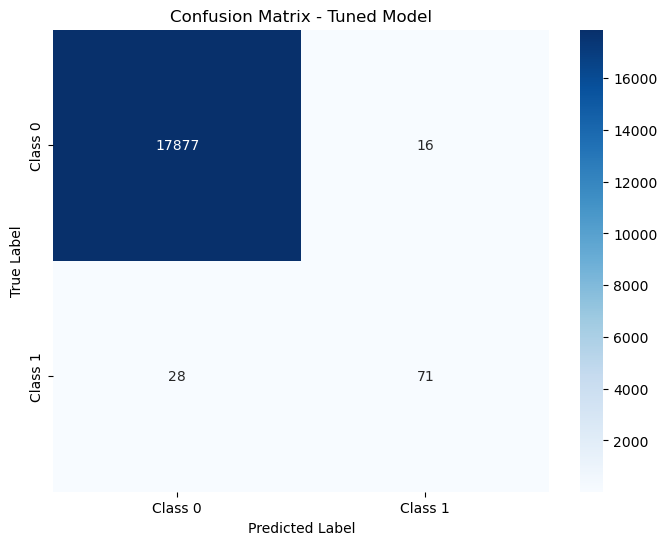

In [95]:
# Visualisasikan confusion matrix untuk model yang sudah di-tune
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Tuned Model')
plt.show()

### G. FEATURE IMPORTANCE


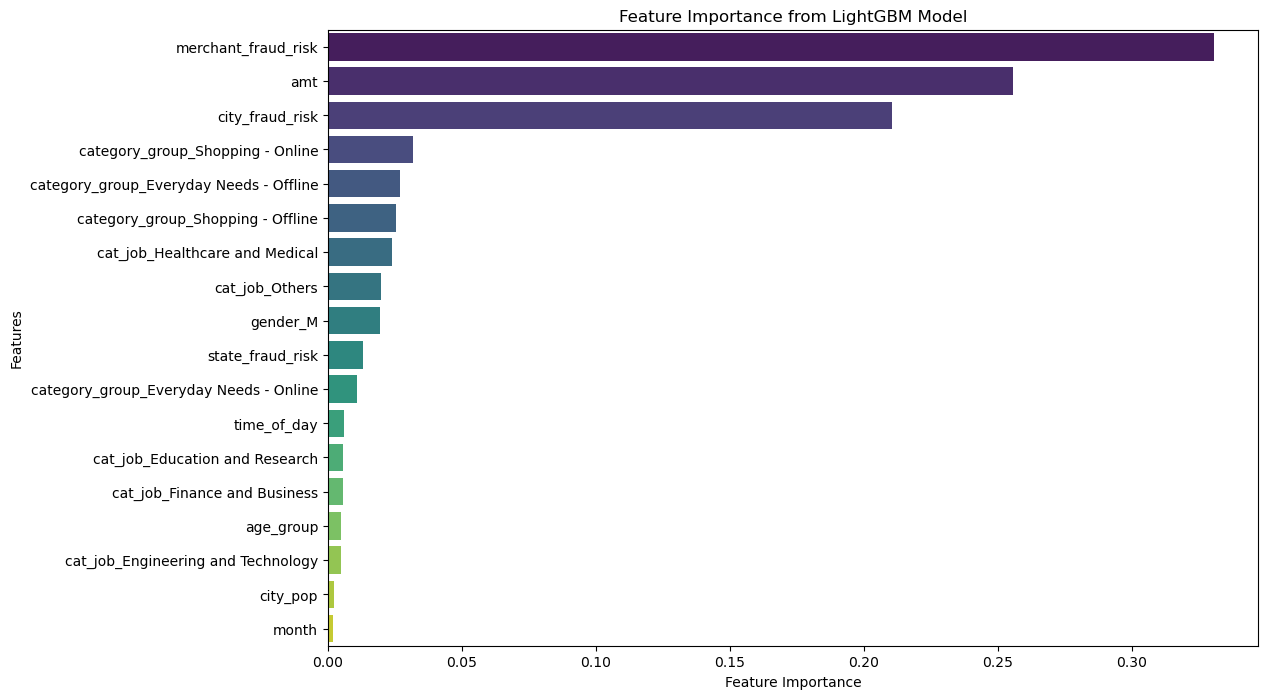

In [96]:
save_model = pipeline_default.fit(X_train, y_train)
preprocess = save_model.named_steps['preprocess']

one_hot_features = list(preprocess.named_transformers_['one_hot'].get_feature_names_out())
ordinal_features = list(preprocess.named_transformers_['ordinal'].get_feature_names_out())
other_features = ['amt', 'city_pop', 'transaction_distance', 'month']
cols = one_hot_features + ordinal_features + other_features
X_train_transformed = preprocess.transform(X_train)
model = save_model.named_steps['model']


importances = model.feature_importances_

feature_selector = save_model.named_steps['feature_selector']
selected_features = feature_selector.get_support()  
selected_feature_names = [cols[i] for i in range(len(cols)) if selected_features[i]]
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from LightGBM Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


 99%|===================| 41734/41981 [01:40<00:00]        

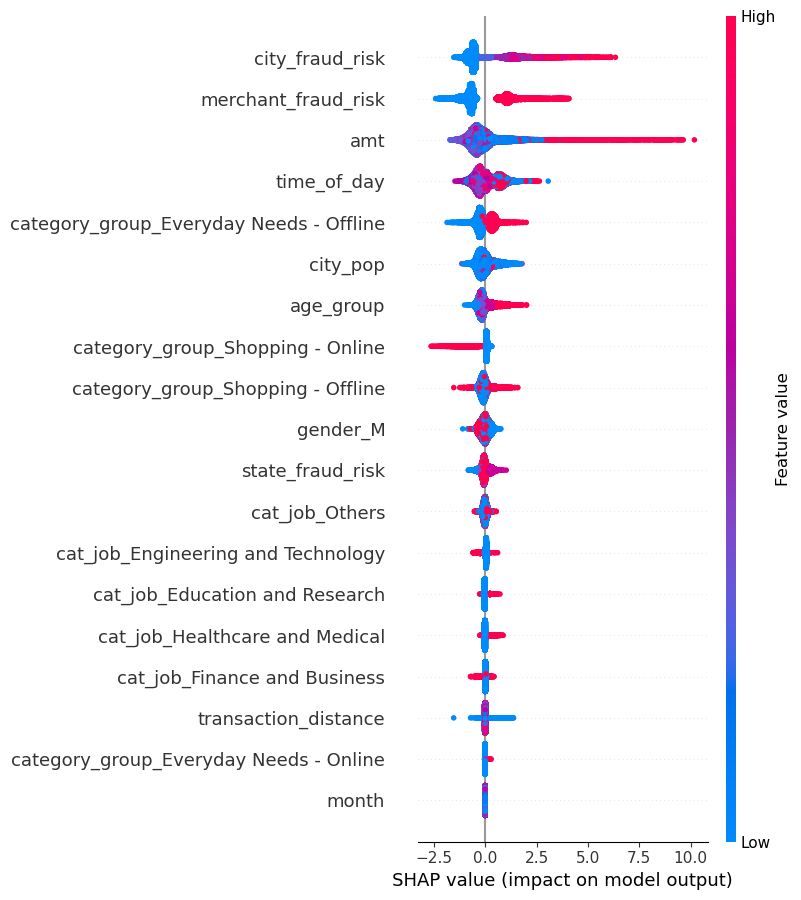

In [97]:
#Shap 
save_model = pipeline_default.fit(X_train, y_train)

# Ambil preprocess step dari pipeline
preprocess = save_model.named_steps['preprocess']

# Ambil nama fitur dari preprocessing
one_hot_features = list(preprocess.named_transformers_['one_hot'].get_feature_names_out())
ordinal_features = list(preprocess.named_transformers_['ordinal'].get_feature_names_out())
other_features = ['amt', 'city_pop', 'transaction_distance', 'month']
cols = one_hot_features + ordinal_features + other_features

# Transform data menggunakan pipeline
X_train_transformed = preprocess.transform(X_train)

# Ambil model dari pipeline
model = save_model.named_steps['model']

# Hitung SHAP values
explainer = shap.Explainer(model, X_train_transformed)
shap_values = explainer(X_train_transformed)

# Plot SHAP values
shap.summary_plot(shap_values, X_train_transformed, feature_names=cols)


In [104]:
data_test = pd.concat([X_test, y_test], axis=1)

data_test.shape


(17992, 13)

In [105]:
total_cust_fraud = data_test[data_test['is_fraud']==1]['is_fraud']
total_cust_fraud.shape[0]

99

In [111]:
# Rule Based :  
fraud_suspects = data_test[
    (
        (data_test['time_of_day'] == 'Night') | 
        (data_test['time_of_day'] == 'Early Morning')
    ) &
    (data_test['merchant_fraud_risk'] == 'High Risk') &
    (data_test['category_group'] == 'Shopping - Online') &
    (data_test['city_fraud_risk'] == 'High Fraud Risk')
]
confirmed_fraud_cases = fraud_suspects[fraud_suspects['is_fraud'] == 1]
print(f"Berdasarkan rule based, transaksi yg diperkirakan fraud berjumlah {fraud_suspects.shape[0]} dan yang benar-benar fraud : {confirmed_fraud_cases.shape[0]}")

Berdasarkan rule based, transaksi yg diperkirakan fraud berjumlah 41 dan yang benar-benar fraud : 16


- Salah prediksi : 41 - 16 = 25 nasabah

- Asumsikan rata-rata kerugian jika terjadi fraud = 100 dolar,

false negatif : 99 - 41 = 58,

maka total kerugian karena ada 58 * 100 dolar = $5800

#### Menggunakan Machine Learning
false positif = 14 nasabah

false negatif = 25 nasabah

maka simulasi total kerugian = 25 * 100 dolar = 2500 dolar


Berdasarkan simulasi dengan data test, penggunaan machine learning bisa mengurangi potensi nasabah complain karena kartu kredit salah blokir(false positif) sekitar 1.79 kali lebih sedikit dibandingkan dengan menggunakan rule-based dan mengurangi potensi kerugian akibat false negatives sekitar 2.32 kali lebih sedikit dibandingkan dengan menggunakan rule-based.

### Rekomendasi 

- Implementasikan sistem deteksi fraud yang memanfaatkan machine learning model seperti XGBoost dan integrasikan ke system pembayaran untuk memantau dan menganalisis transaksi secara realtime untuk memantau transaksi secara realtime. Sistem ini harus dapat memberikan peringatan atau menahan transaksi yang mencurigakan untuk verifikasi lebih lanjut. Nasabah perlu segera mengkonfirmasi transaksi tersebut. Jika terdeteksi fraud, maka kartu kredit diblokir sementara,kirim notifikasi kepada nasabah minta nasabah untuk segera infokan apakah transaksi tersebut transaksi nasabah atau bukan. Blokir permanen jika transaksi tersebut bukan transaksi nasabah. Segera buka blokir jika nasabah mengkonfirmasi itu adalah transaksinya karena berpotensi complain. 

- Untuk fitur - fitur yang penting dalam pemodelan seperti merchant, jumlah transaksi, kota dan kategori transaksi perlu dilakukan verifikasi ganda atau otentikasi tambahan untuk transaksi yang mencurigakan atau memiliki nilai tinggi. Edukasi pelanggan tentang tanda-tanda fraud dan pentingnya melaporkan aktivitas mencurigakan. 


